In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns
import numpy.polynomial.polynomial as poly

In [2]:
filename = "Definitiva.csv"
data = pd.read_csv(filename, encoding='latin-1')

In [3]:
data.head()

,Fecha,Estado,Sector,Crédito Nominal,Exportación Nominal,Crédito Real,Exportación Real
0,01/01/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",254.0,11635.44,334.68,15331.16
1,01/04/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",281.0,10603.14,368.48,13904.00
2,01/07/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",288.0,12663.17,374.93,16485.44
3,01/10/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",343.0,12202.72,442.58,15745.29
4,01/10/2008,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",321.4,12651.98,390.60,15375.90


In [5]:
# date.sort(key = lambda date: datetime.strptime(date, '%d/%m/%Y')) # Sort the dates in order
Fechas = pd.date_range('01/01/2007','01/10/2017', 
              freq='3MS').strftime("%d/%m/%Y").tolist()
Sectores = [' I. Sector agropecuario, silvícola y pesquero',
 ' II. Sector industrial',
 ' III. Sector servicios y otras actividades']
#set(data['Sector'])

In [8]:
df_fechas = []
for fecha in Fechas:
    for sector in Sectores:
        aux = data[(data['Fecha']==fecha) & (data['Sector']==sector)]
        tot_credito = np.sum(aux[' Crédito Real '])
        tot_exportacion = np.sum(aux[' Exportación Real '])
        df_fechas.append([fecha, sector, tot_credito, tot_exportacion])

In [9]:
pd_fechas = pd.DataFrame(df_fechas, columns=['Fecha', 'Sector', ' Crédito Real ', ' Exportación Real '])
pd_fechas.head(10)

,Fecha,Sector,Crédito Real,Exportación Real
0,01/01/2007,"I. Sector agropecuario, silvícola y pesquero",26998.14,595808.77
1,01/01/2007,II. Sector industrial,283900.83,131155.49
2,01/01/2007,III. Sector servicios y otras actividades,393623.42,12922.33
3,01/04/2007,"I. Sector agropecuario, silvícola y pesquero",29467.74,677288.12
4,01/04/2007,II. Sector industrial,321046.60,142579.16
5,01/04/2007,III. Sector servicios y otras actividades,412132.65,12681.28
6,01/07/2007,"I. Sector agropecuario, silvícola y pesquero",32896.26,727525.95
7,01/07/2007,II. Sector industrial,359700.80,138797.91
8,01/07/2007,III. Sector servicios y otras actividades,436804.16,14957.27
9,01/10/2007,"I. Sector agropecuario, silvícola y pesquero",35212.55,769840.45


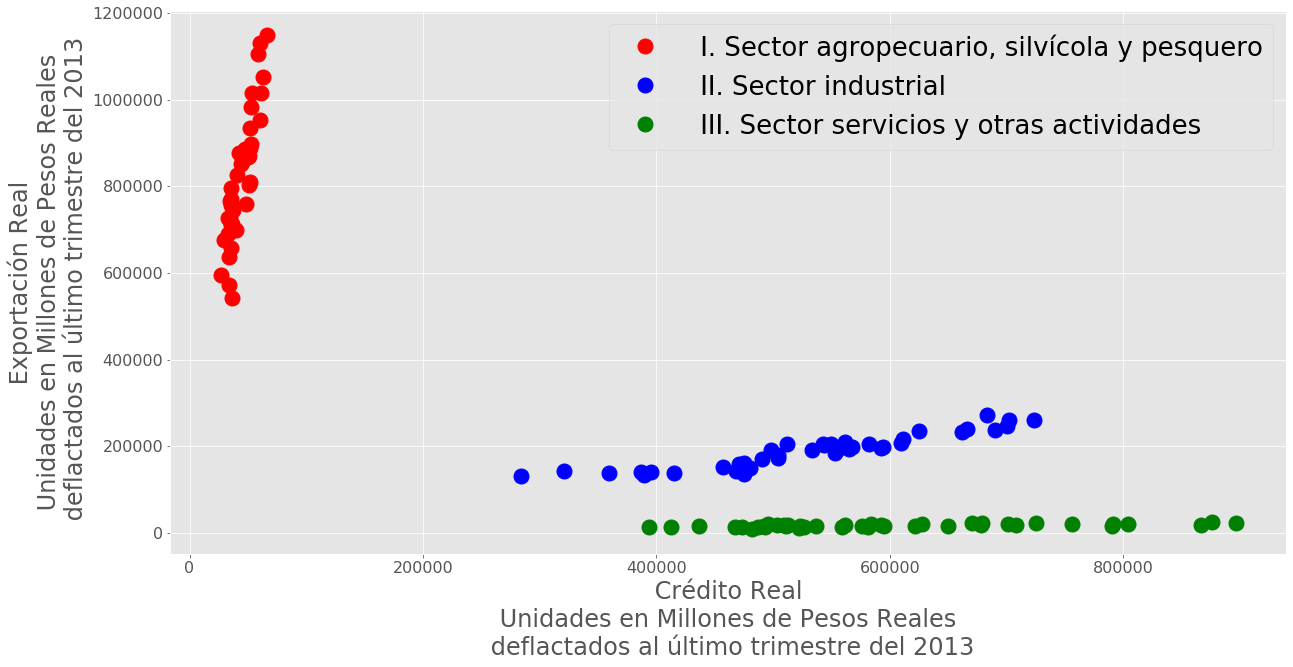

In [25]:

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

colores = ['red', 'blue', 'green']

for idx, sector in enumerate(Sectores):
    aux = pd_fechas[pd_fechas['Sector']==sector]
    x = aux[' Crédito Real ']
    y = aux[' Exportación Real ']
    plt.plot(x, y, 'o', color=colores[idx], label=sector, markersize=15)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(' Crédito Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
plt.ylabel(' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)

plt.legend(loc='best', fontsize=26)

# plt.legend(loc='best', bbox_to_anchor=(0., 1.15), fontsize=14)

poly([2.55043505e+05 1.28101064e+01])


Text(0, 0.5, ' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013')

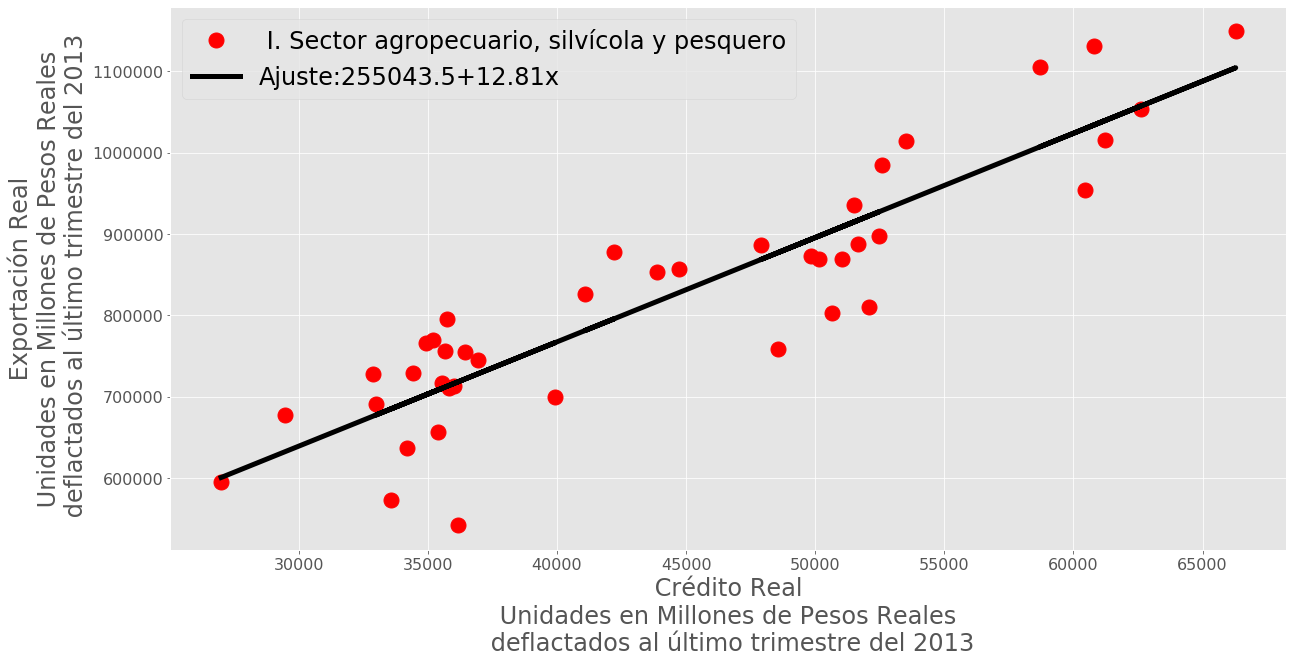

In [23]:
sector = Sectores[0]
aux = pd_fechas[pd_fechas['Sector']==sector]
x = aux[' Crédito Real ']
y = aux[' Exportación Real ']

coef = poly.polyfit(x, y, 1,rcond=None,w=None) # Assuming a Polynomyal degree 1
model = poly.Polynomial(coef)
print(model)

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

plt.plot(x, y, 'o', color='red', label=sector, markersize=15)
plt.plot(x, model(x),'k', label=r'Ajuste:{}+{}x'.format(round(coef[0],2),round(coef[1],2)), linewidth=5)

plt.legend(loc='best', fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(' Crédito Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
plt.ylabel(' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)


poly([2.92305984e+03 3.48659501e-01])


Text(0, 0.5, ' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013')

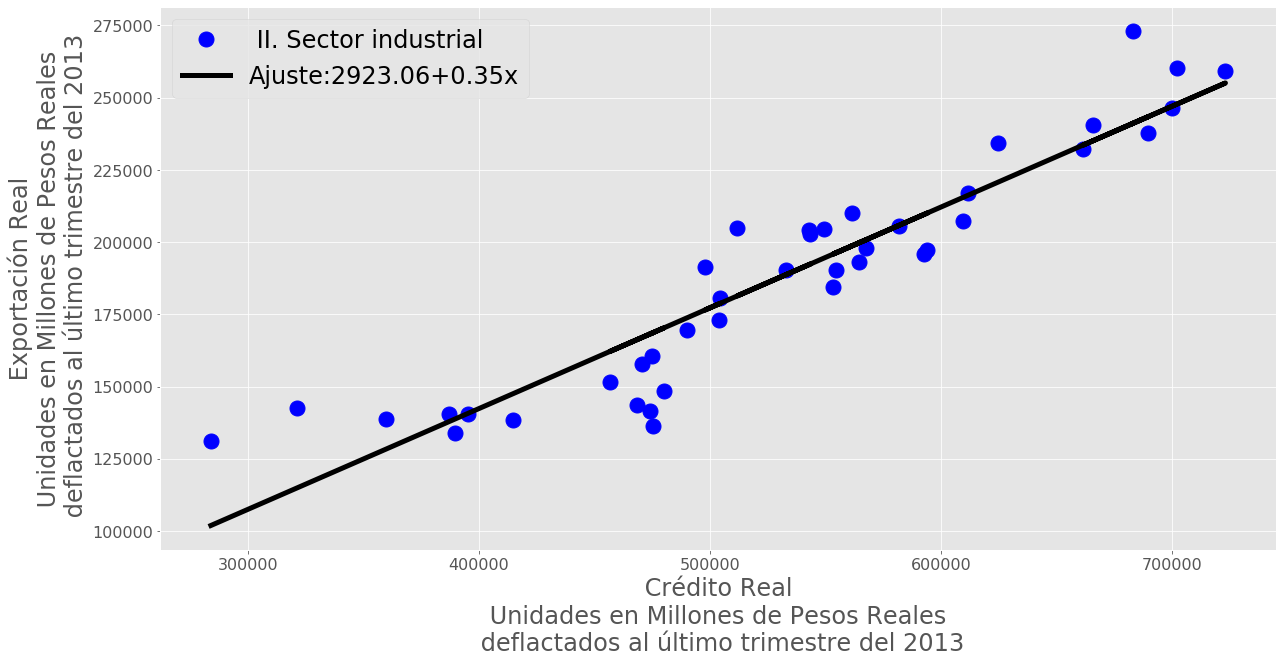

In [24]:
sector = Sectores[1]
aux = pd_fechas[pd_fechas['Sector']==sector]
x = aux[' Crédito Real ']
y = aux[' Exportación Real ']

coef = poly.polyfit(x, y, 1,rcond=None,w=None) # Assuming a Polynomyal degree 1
model = poly.Polynomial(coef)
print(model)

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

plt.plot(x, y, 'o', color='blue', label=sector, markersize=15)
plt.plot(x, model(x),'k', label=r'Ajuste:{}+{}x'.format(round(coef[0],2),round(coef[1],2)), linewidth=5)

plt.legend(loc='best', fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(' Crédito Real ', fontsize=24)
plt.ylabel(' Exportación Real ', fontsize=24)

plt.xlabel(' Crédito Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
plt.ylabel(' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)


poly([5.30925539e+03 1.95109629e-02])


Text(0, 0.5, ' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013')

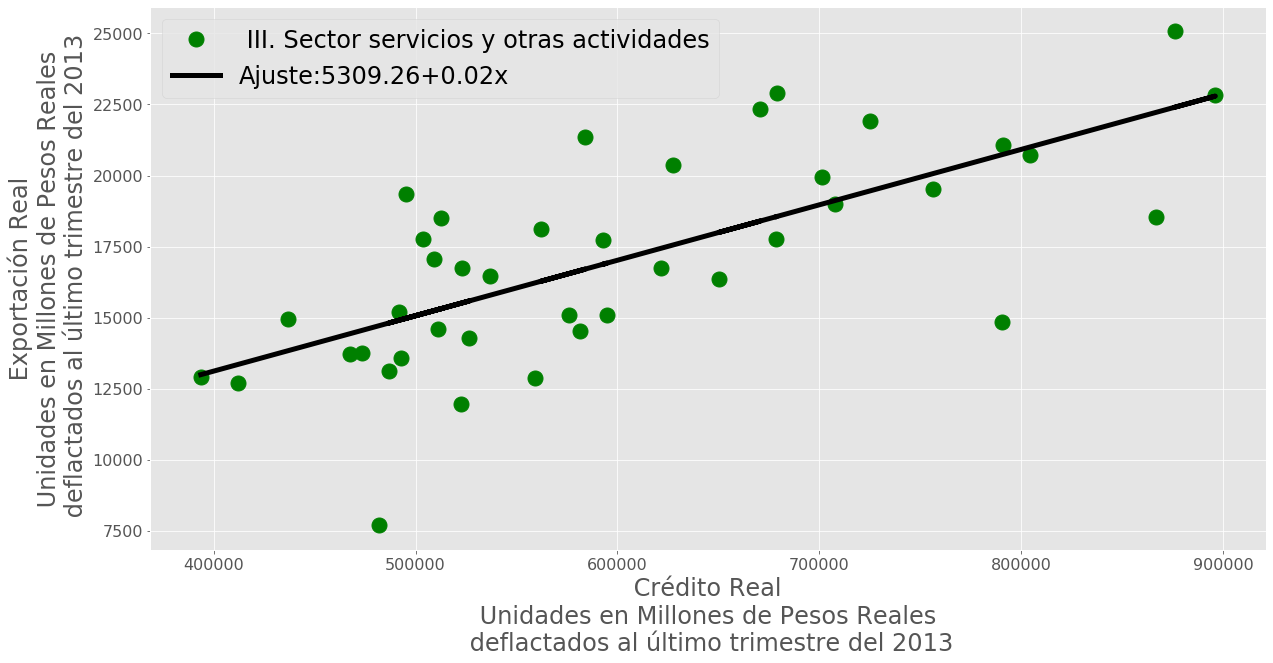

In [26]:
sector = Sectores[2]
aux = pd_fechas[pd_fechas['Sector']==sector]
x = aux[' Crédito Real ']
y = aux[' Exportación Real ']

coef = poly.polyfit(x, y, 1,rcond=None,w=None) # Assuming a Polynomyal degree 1
model = poly.Polynomial(coef)
print(model)

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

plt.plot(x, y, 'o', color='green', label=sector, markersize=15)
plt.plot(x, model(x),'k', label=r'Ajuste:{}+{}x'.format(round(coef[0],2),round(coef[1],2)), linewidth=5)

plt.legend(loc='best', fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(' Crédito Real ', fontsize=24)
plt.ylabel(' Exportación Real ', fontsize=24)

plt.xlabel(' Crédito Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
plt.ylabel(' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
